# **Model Evaluation**

Defining root folder for root resources access such as `data/` and `utils/`

In [1]:
from pathlib import Path
import sys

ROOT_DIR = Path.cwd().parent  
sys.path.insert(0, str(ROOT_DIR))

## **0. Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from pathlib import Path
from torch import nn
from utils import helpers
import os
from PIL import Image

/home/shiba/Programming/nail-disease-classifier/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading the data

In [3]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T
from torch.utils.data import DataLoader


# Normalization and transforming data into tensors
transform = T.Compose([
    T.Resize(size=(224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

DATA_DIR = ROOT_DIR / "data"
TEST_DIR = DATA_DIR / "test"
test_data = ImageFolder(root=TEST_DIR,
                        transform=transform,
                        target_transform=None)

class_names = test_data.classes
num_classes = len(class_names)

# Test Dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## Models

In [4]:
OUTPUTS_PATH = ROOT_DIR / "outputs"
model_dict = {}

### EfficientNetV2S

In [5]:
from torchvision import models

MODEL_NAME = "efficientnetv2s"
EPOCH = 5

# Rebuilding model
efficientnetv2s = models.efficientnet_v2_s()
efficientnetv2s.classifier[1] = nn.Linear(efficientnetv2s.classifier[1].in_features, num_classes)
efficientnetv2s = efficientnetv2s.to(device)

# Loading weights
WEIGHTS_PATH = OUTPUTS_PATH / MODEL_NAME / "weights" / f"{MODEL_NAME}_epoch{EPOCH}.pth"
state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
efficientnetv2s.load_state_dict(state_dict=state_dict)

# Appending to model dict
model_dict[MODEL_NAME] = efficientnetv2s

### SwinV2B

In [6]:
MODEL_NAME = "swinv2b"
EPOCH = 5

# Rebuilding Model
swinv2b = models.swin_v2_b()
swinv2b.head = nn.Linear(in_features=1024, out_features=num_classes, bias=True)
swinv2b.to(device)

# Loading weights
WEIGHTS_PATH = OUTPUTS_PATH / MODEL_NAME / "weights" / f"{MODEL_NAME}_epoch{EPOCH}.pth"
state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
swinv2b.load_state_dict(state_dict=state_dict)

model_dict[MODEL_NAME] = swinv2b

### RegNetY16GF

In [7]:
MODEL_NAME = "regnety16gf"
EPOCH = 5

# Rebuilding Model
regnety16gf = models.regnet_y_16gf()
regnety16gf.fc = nn.Linear(in_features=3024, out_features=num_classes, bias=True)
regnety16gf.to(device)

# Loading weights
WEIGHTS_PATH = OUTPUTS_PATH / MODEL_NAME / "weights" / f"{MODEL_NAME}_epoch{EPOCH}.pth"
state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
regnety16gf.load_state_dict(state_dict=state_dict)

model_dict[MODEL_NAME] = regnety16gf

### Resnet50

In [8]:
MODEL_NAME = "resnet50"
EPOCH = 5

# Rebuilding Model
resnet50 = models.resnet50()
resnet50.fc = nn.Linear(in_features=2048, out_features=num_classes, bias=True)
resnet50.to(device)

# Loading weights
WEIGHTS_PATH = OUTPUTS_PATH / MODEL_NAME / "weights" / f"{MODEL_NAME}_epoch{EPOCH}.pth"
state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
resnet50.load_state_dict(state_dict=state_dict)

model_dict[MODEL_NAME] = resnet50

### VGG16

In [9]:
MODEL_NAME = "vgg16"
EPOCH = 5

# Rebuilding Model
vgg16 = models.vgg16()
vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)  # Change VGG16 to output 10 classes
vgg16 = vgg16.to(device)

# Loading weights
WEIGHTS_PATH = OUTPUTS_PATH / MODEL_NAME / "weights" / f"{MODEL_NAME}_epoch{EPOCH}.pth"
state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
vgg16.load_state_dict(state_dict=state_dict)

model_dict[MODEL_NAME] = vgg16

## Making single predictions

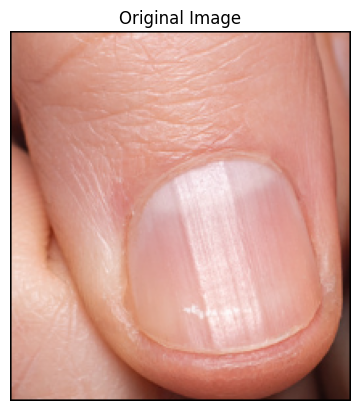

efficientnetv2s

Predicted class index: Healthy Nail
Confidence values:
Acral Lentiginous Melanoma: 14.73%
Beaus Line: 0.04%
Blue Finger: 8.31%
Clubbing: 0.03%
Healthy Nail: 75.79%
Koilonychia: 0.07%
Muehrckes Lines: 0.74%
Onychogryphosis: 0.07%
Pitting: 0.08%
Terry-s Nail: 0.15%
Grad-CAM failed: 'Sequential' object has no attribute 'blocks'
swinv2b

Predicted class index: Healthy Nail
Confidence values:
Acral Lentiginous Melanoma: 0.88%
Beaus Line: 0.00%
Blue Finger: 0.05%
Clubbing: 0.00%
Healthy Nail: 98.86%
Koilonychia: 0.02%
Muehrckes Lines: 0.01%
Onychogryphosis: 0.00%
Pitting: 0.03%
Terry-s Nail: 0.14%
regnety16gf

Predicted class index: Healthy Nail
Confidence values:
Acral Lentiginous Melanoma: 0.61%
Beaus Line: 0.01%
Blue Finger: 0.09%
Clubbing: 0.12%
Healthy Nail: 99.01%
Koilonychia: 0.03%
Muehrckes Lines: 0.05%
Onychogryphosis: 0.00%
Pitting: 0.05%
Terry-s Nail: 0.04%
resnet50

Predicted class index: Healthy Nail
Confidence values:
Acral Lentiginous Melanoma: 5.44%
Beaus Lin

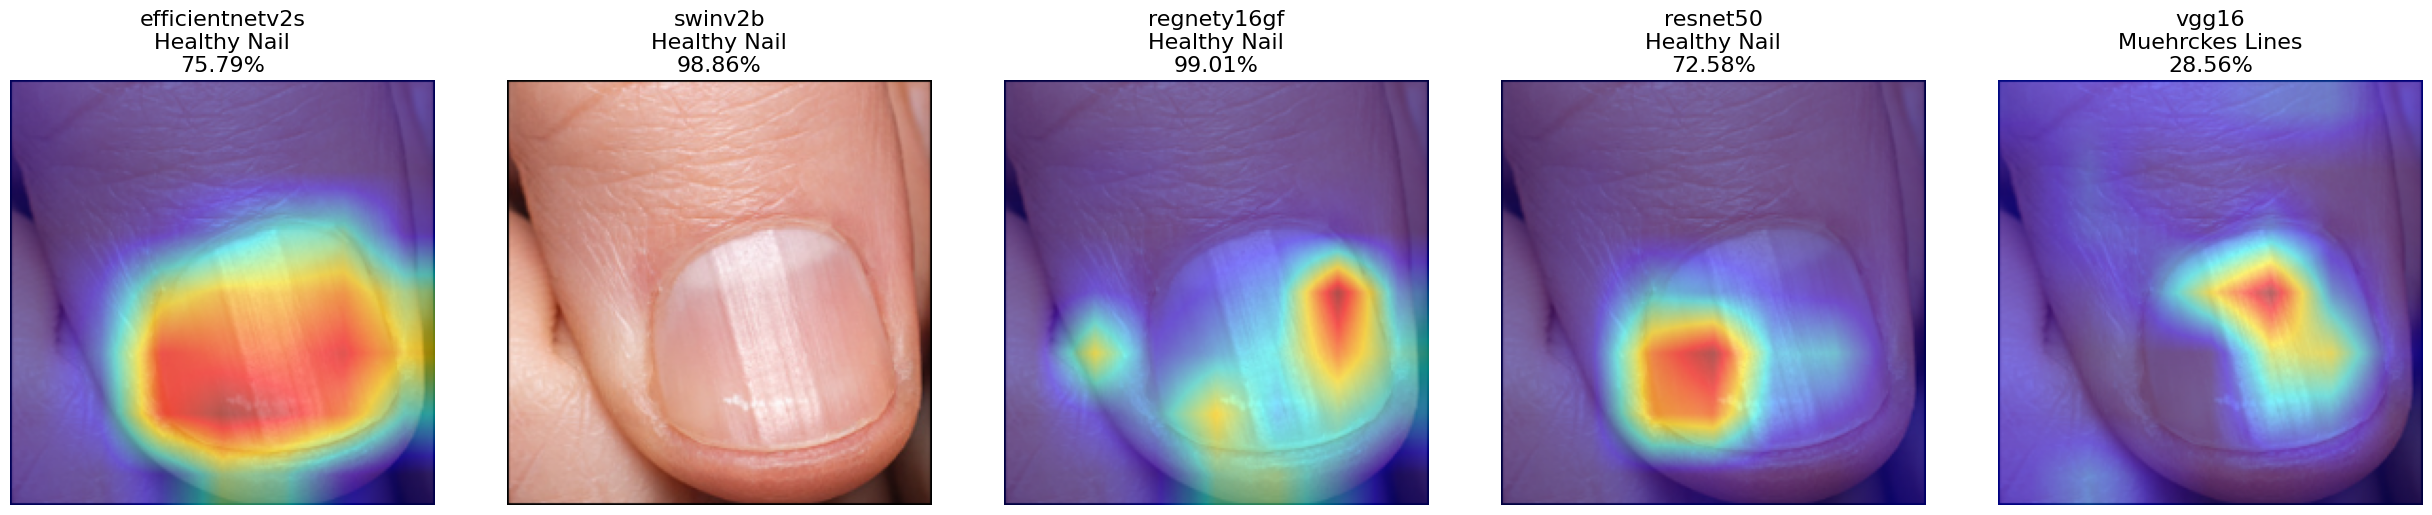

In [ ]:
FILE_NAME = "0.png"

IMAGE_PATH = ROOT_DIR / FILE_NAME

img = torchvision.io.decode_image(IMAGE_PATH)
plt.title("Original Image")
plt.imshow(img.permute(1, 2, 0))
plt.axis(False)
plt.show()

fig, axs = plt.subplots(1, len(model_dict), figsize=(5 * len(model_dict), 5))

for i, (name, model) in enumerate(model_dict.items()):
    print(name)
    pred_prob, pred_class, cam_img = helpers.make_single_prediction(
        model=model,
        model_name=name,
        image_path=IMAGE_PATH,
        class_names=class_names,
        transforms=transform,
        device=device,
        show_confidence=True
    )

    axs[i].imshow(cam_img)
    axs[i].axis("off")
    axs[i].set_title(f"{name}\n{class_names[pred_class]}\n{pred_prob.max()*100:.2f}%", fontsize=16)

plt.tight_layout()
plt.show()
